In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.shape

(918, 12)

In [4]:
data.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
# Преобразование категориальных данных в количественные
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['ChestPainType'] = data['ChestPainType'].map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
data['RestingECG'] = data['RestingECG'].map({'Normal': 0, 'ST': 1, 'LVH': 2})
data['ExerciseAngina'] = data['ExerciseAngina'].map({'N': 0, 'Y': 1})
data['ST_Slope'] = data['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [7]:
data['HeartDisease'].unique()

array([0, 1])

In [8]:
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

C:\Users\кря\AppData\Local\Temp\ipykernel_5416\950761939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='coolwarm')


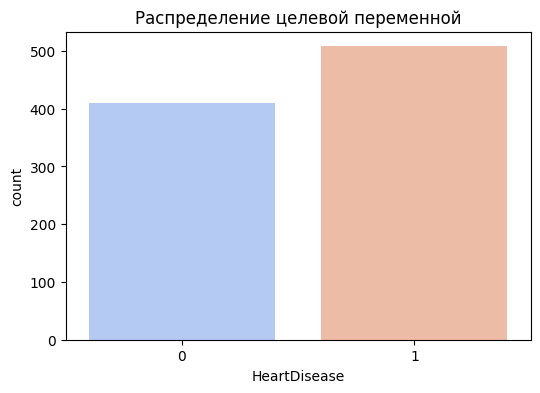

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.show()   

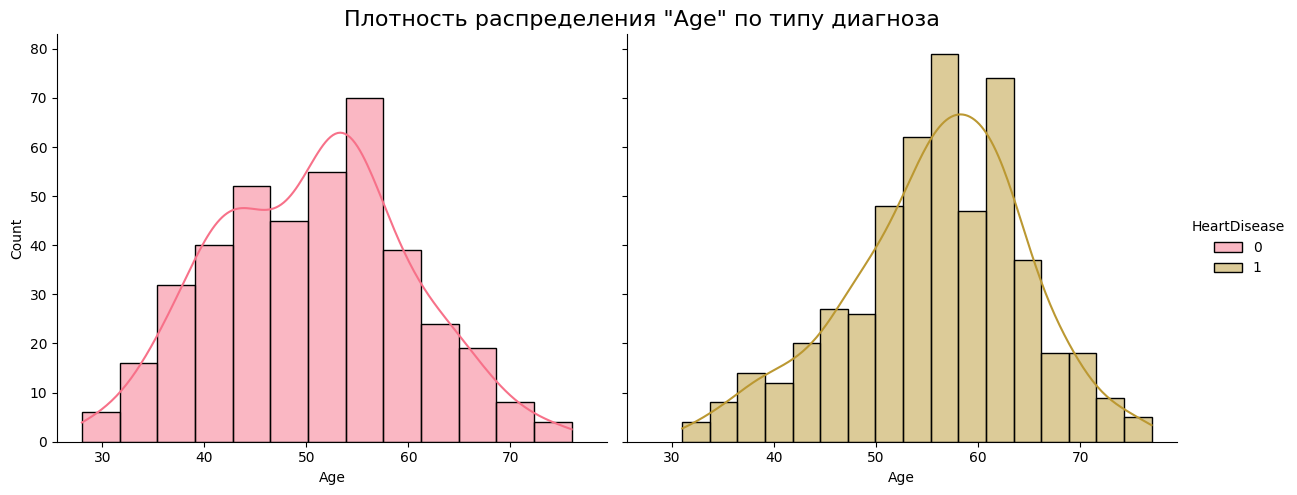

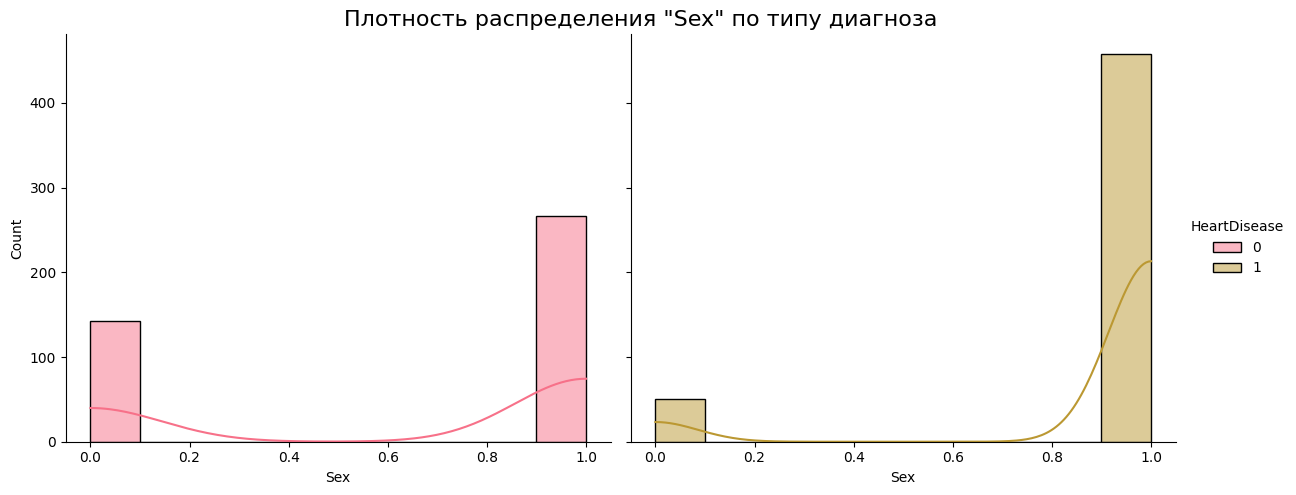

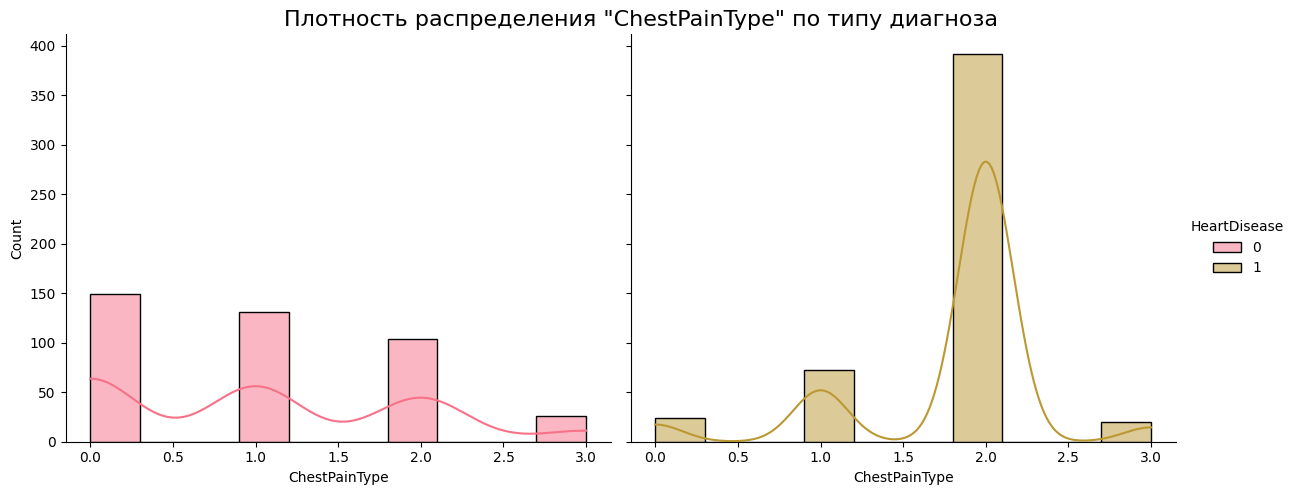

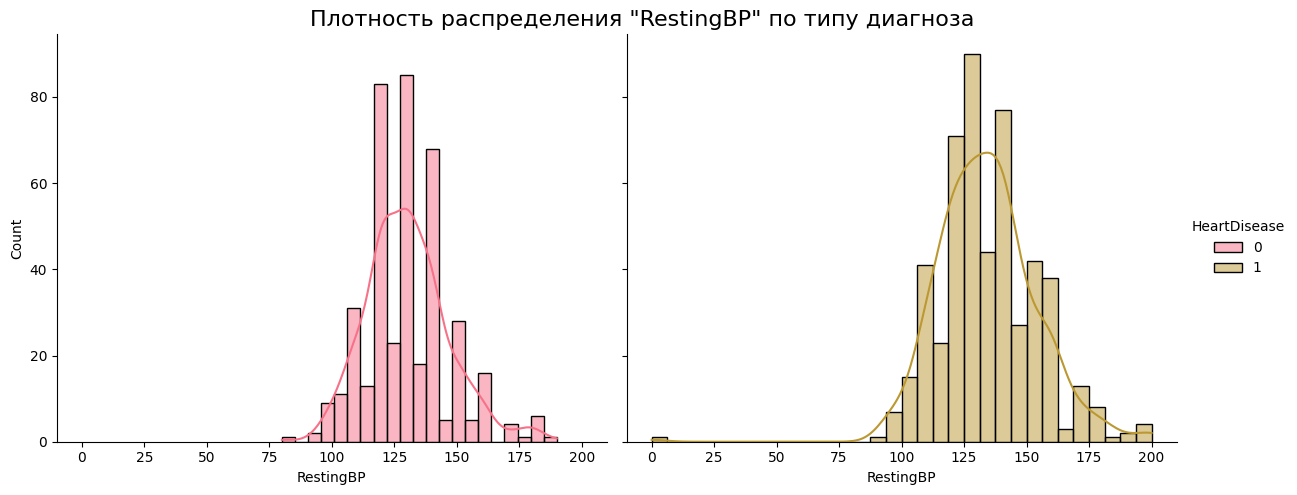

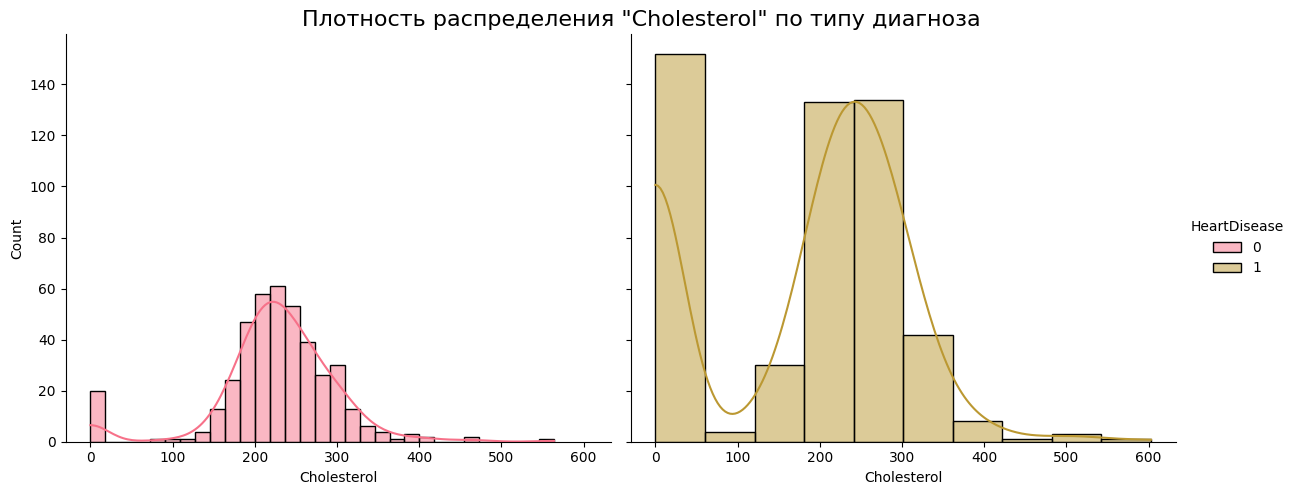

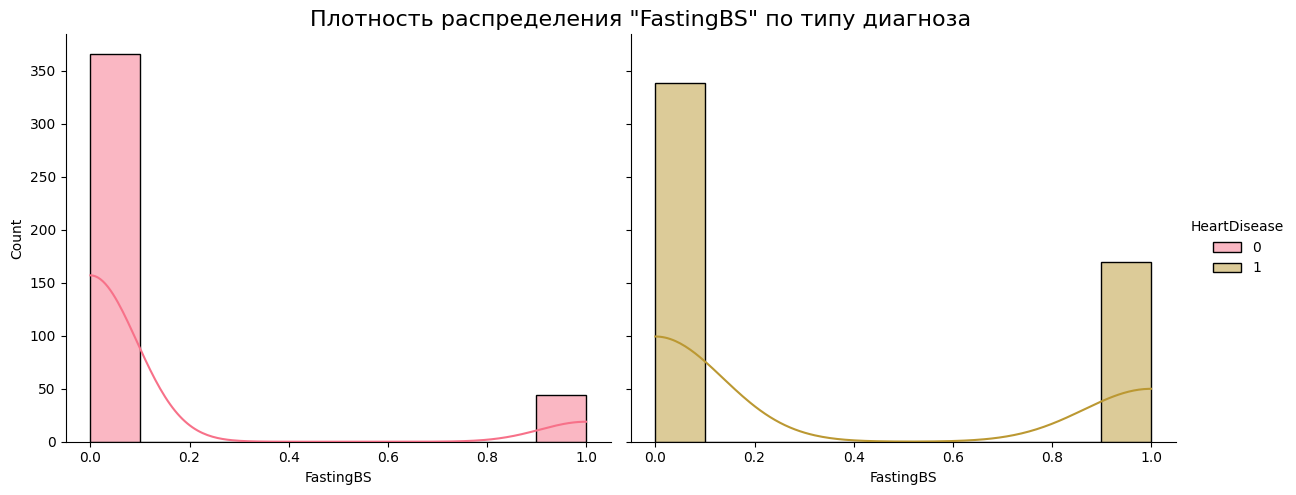

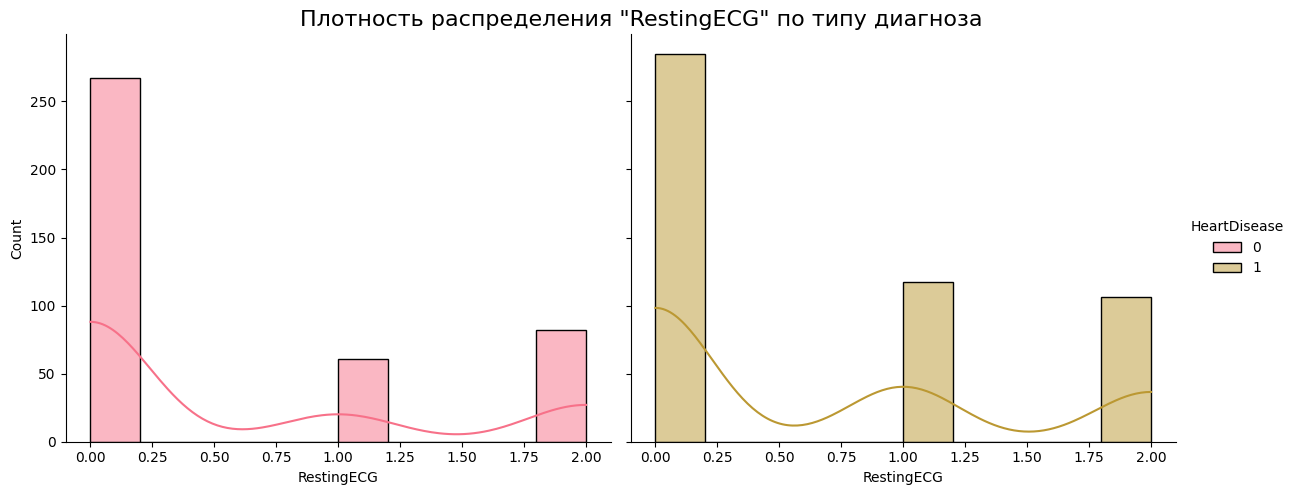

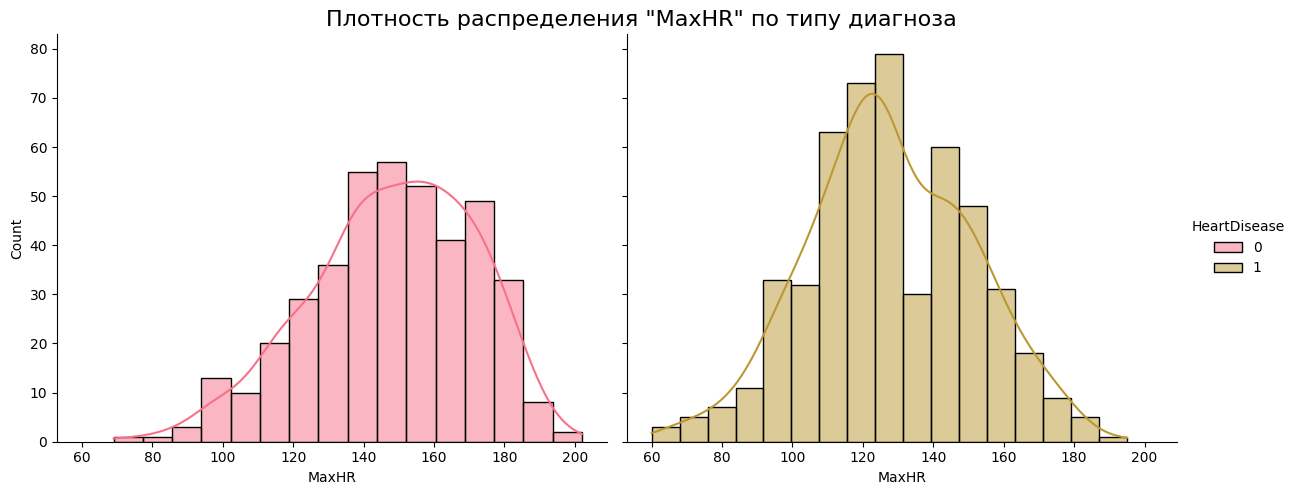

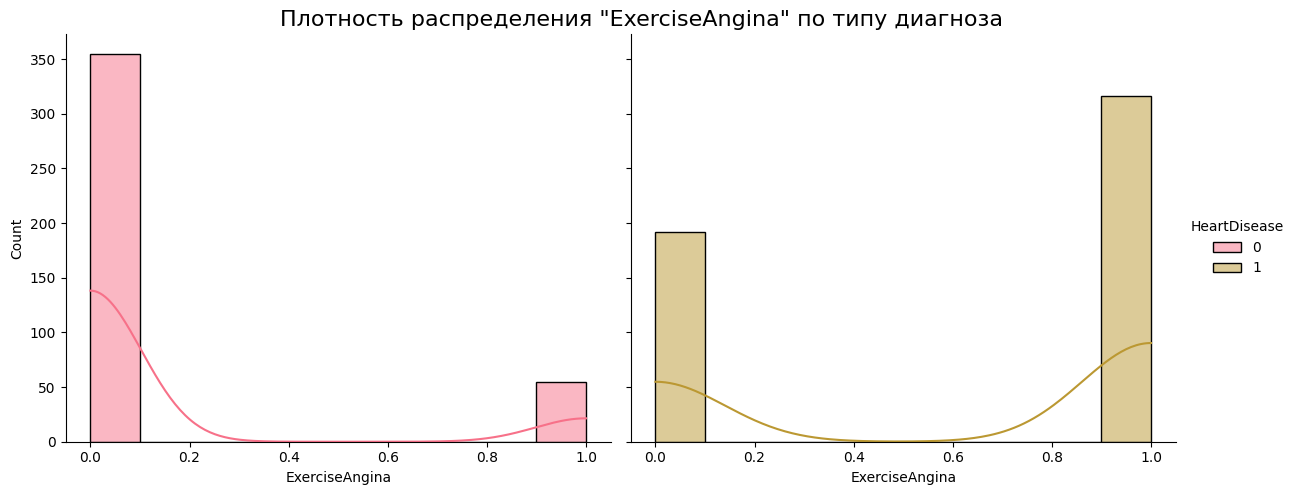

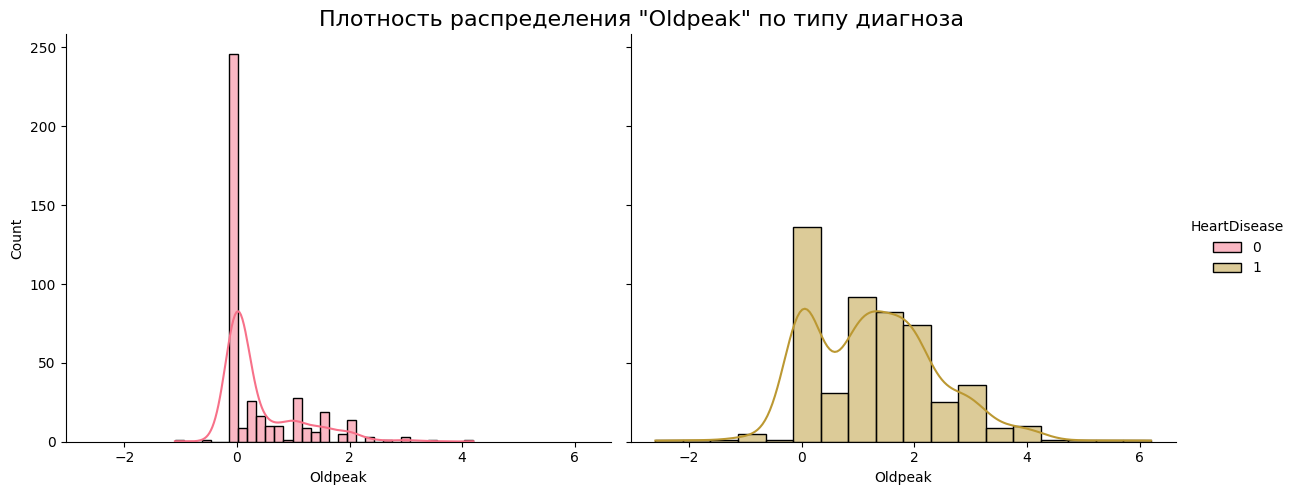

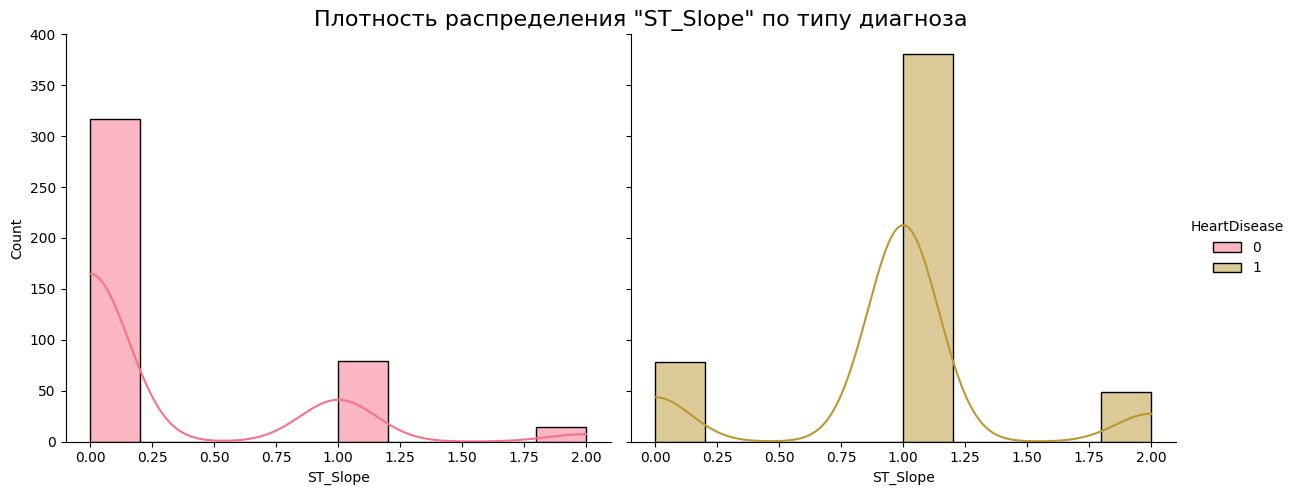

In [10]:
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

for feature in features:
    g = sns.FacetGrid(data, col='HeartDisease', hue='HeartDisease', height=5, aspect=1.2)
    g.map(sns.histplot, feature, kde=True)
    g.add_legend()
    g.set_titles("")
    g.fig.suptitle(f'Плотность распределения "{feature}" по типу диагноза', fontsize=16)
    plt.show()

<Figure size 1200x1000 with 0 Axes>

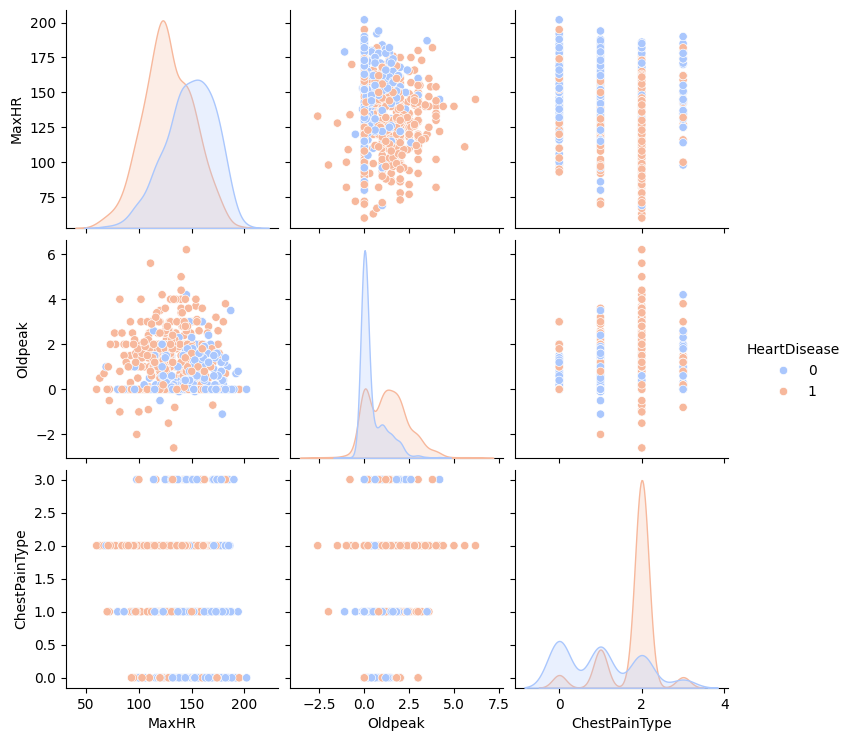

In [11]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[['MaxHR', 'Oldpeak', 'ChestPainType', 'HeartDisease']], hue='HeartDisease', palette='coolwarm')
plt.show()

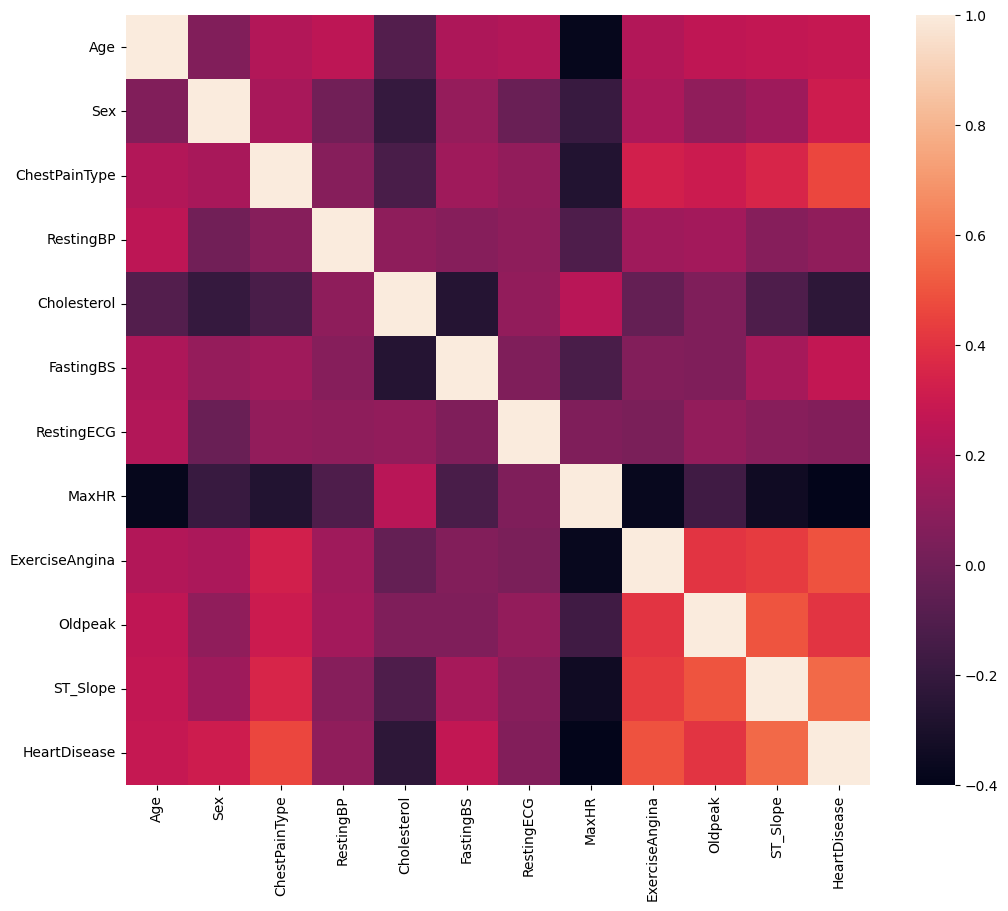

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True))
plt.show()

In [13]:
X = data.drop(['HeartDisease'], axis=1)
y = data['HeartDisease']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (918, 11) | y shape: (918,) 


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(-0.029594504060795283), pvalue=np.float64(0.976396895053816), df=np.float64(916.0))

In [16]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=2000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.844632 (0.054454)
LDA: 0.848704 (0.053245)
KNN: 0.701648 (0.034002)
CART: 0.802462 (0.059836)
NB: 0.850019 (0.049617)
SVC: 0.568086 (0.018923)


In [19]:
sk_nb = GaussianNB()
sk_nb.fit(X_train, y_train)
sk_nb_pred_res = sk_nb.predict(X_test)
sk_nb_accuracy = accuracy_score(y_test, sk_nb_pred_res)

print(f'GaussianNB accuracy: {sk_nb_accuracy}')
print(f'GaussianNB prediction: {sk_nb_pred_res}')

# Вычисление коэффициент детерминации
r2 = r2_score(y_test, sk_nb_pred_res)
print('r2=', r2)
# Вычисление среднекваратичной ошибки (MSE и RMSE)
MSE = mean_squared_error(y_test, sk_nb_pred_res)
print('MSE=', MSE)
RMSE = sqrt(mean_squared_error(y_test, sk_nb_pred_res))
print('RMSE=', RMSE)

GaussianNB accuracy: 0.8206521739130435
GaussianNB prediction: [1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1]
r2= 0.27403156384505023
MSE= 0.1793478260869565
RMSE= 0.4234947769299599


<Axes: title={'center': 'NB surface'}>

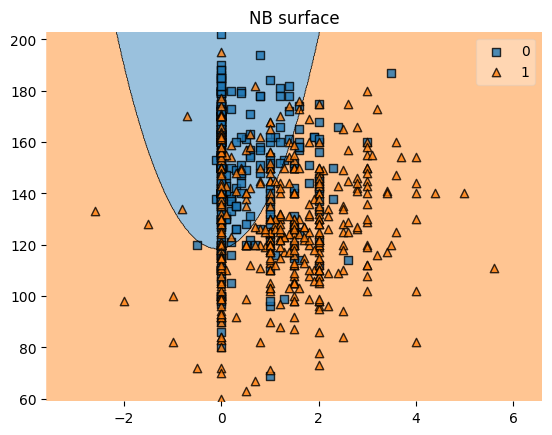

In [20]:
y_s = y_train
X_2d= X_train[['Oldpeak', 'MaxHR']].values

y_2d = y_s.values


sk_nb1 = GaussianNB()
sk_nb1.fit(X_2d, y_2d)

plt.title('NB surface')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_nb1)